In [69]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

1.14.0
2.3.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# getting data
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
# cat= photo
# dogs= Signature

In [5]:
train_cats = os.path.join(train_dir, 'photo')
train_dogs = os.path.join(train_dir, 'signature')
validation_cats = os.path.join(validation_dir, 'photo')
validation_dogs = os.path.join(validation_dir, 'signature')

In [12]:
num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))
#print(num_dogs_val)

In [13]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [14]:
BATCH_SIZE = 32
IMG_SHAPE = 150 # square image

In [15]:
#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')



Found 1500 images belonging to 2 classes.


In [17]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 500 images belonging to 2 classes.


In [18]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [26]:
EPOCHS = 10

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Epoch 1/10
47/47 [==============================] - 83s 2s/step - loss: 0.0080 - acc: 0.9953 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 2/10
47/47 [==============================] - 82s 2s/step - loss: 0.0116 - acc: 0.9973 - val_loss: 0.0162 - val_acc: 0.9940
Epoch 3/10
47/47 [==============================] - 83s 2s/step - loss: 0.0151 - acc: 0.9973 - val_loss: 0.0079 - val_acc: 0.9940
Epoch 4/10
47/47 [==============================] - 81s 2s/step - loss: 0.0040 - acc: 0.9973 - val_loss: 0.0042 - val_acc: 0.9960
Epoch 5/10
47/47 [==============================] - 82s 2s/step - loss: 0.0037 - acc: 0.9980 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 6/10
47/47 [==============================] - 89s 2s/step - loss: 0.0074 - acc: 0.9967 - val_loss: 0.0193 - val_acc: 0.9880
Epoch 7/10
47/47 [==============================] - 78s 2s/step - loss: 0.0173 - acc: 0.9947 - val_loss: 0.0128 - val_acc: 0.9980
Epoch 8/10
47/47 [==============================] - 82s 2s/step - loss: 0.0041 - acc: 0.99

In [23]:
#print("Saving model to disk.....")
#model.save("sign_classifier.h5")
#print("Sucessfully Saved model to disk")

Saving model to disk.....
Sucessfully Saved model to disk


In [27]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [28]:
# analysis
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

Text(0.5, 1.0, 'Training and Validation Accuracy')

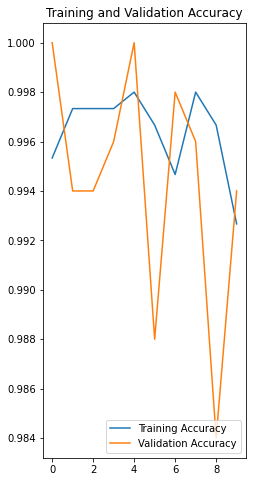

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

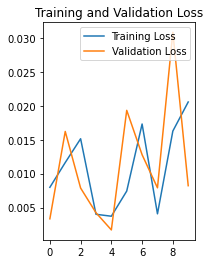

In [30]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Murugan\\Desktop\\class_test\\a8.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#training_set.class_indices
print(result)
print()
if result[0][0] == 1:
    prediction = 'photo'
    print(prediction)
else:
    prediction = 'signature'
    print(prediction)

[[1. 0.]]

photo


In [63]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
res = load_model('sign_classifier_1.h5')
res.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [64]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Murugan\\Desktop\\class_test\\a8.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = res.predict(test_image)
#training_set.class_indices
print(result)
print()
if result[0][0] == 1:
    prediction = 'photo'
    print(prediction)
else:
    prediction = 'signature'
    print(prediction)

[[1. 0.]]

photo
